
### Linear Regression of Automobile Data w/Cross Validation
### By Randy Leon

## INTRODUCTION

Presented to me was a data set with 205 observations and 26 attributes describing automobile data sourced from the UCI Machine Learning Repository.

I am tasked with constructing two (2) different linear regression models with three (3) explanatory variables each in order to predict "curb-weight". (our response variable)

I plan to achieve this by completing the following steps:

1) Load the data into this notebook.

2) Perform sufficient exploratory data analysis to understand, clean and analyze the data.

3) Construct and evaluate my linear regression models, making sure to make use of k-fold cross validation.

**Data Set Description from https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names**


1. Source Information:
   -- Creator/Donor: Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
   -- Date: 19 May 1987
   -- Sources:
     
     a) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.

     b) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038 

     c) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037
     
     

2. Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a class attribute.
   
   

3. Number of Instances: 205



4. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal



5. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge honda,isuzu, jaguar, mazda, mercedes-benz, mercury,mitsubishi, nissan, peugot, plymouth, porsche,renault, saab, subaru, toyota, volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 to 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.
 
 

6. Missing Attribute Values: (denoted by "?")
   Attribute #:   Number of instances missing a value:
   2.             41
   6.             2
   19.            4
   20.            4
   22.            2
   23.            2
   26.            4

## EXPLORATORY DATA ANALYSIS

In [33]:
# import dependencies needed
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from matplotlib import rcParams

In [68]:
#Read data From GitHub and put into a df. Column names were found on UC Irvine's website.
df1 = pd.read_csv('https://raw.githubusercontent.com/randleon/Linear-Regression-Using-Sklearn-in-Python/main/Linear-Regression-Using-Sklearn-in-Python_data.csv',
names=['symboling',
'normalized-losses',
'make',
'fuel-type',
'aspiration',
'num-of-doors',
'body-style',
'drive-wheels',
'engine-location',
'wheel-base',
'length',
'width',
'height',
'curb-weight',
'engine-type',
'num-of-cylinders',
'engine-size',
'fuel-system',
'bore',
'stroke',
'compression-ratio',
'horsepower',
'peak-rpm',
'city-mpg',
'highway-mpg',
'price'])

In [69]:
#Sanity check on initial data pull from source.
df1.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [36]:
#choosing only relevant explanatory variables.

df2 = df1.drop(labels=['symboling',
'normalized-losses',
'make',
'fuel-type',
'aspiration',
'num-of-doors',
'body-style',
'drive-wheels',
'engine-location',
'engine-type',
'num-of-cylinders',
'fuel-system',
'bore',
'stroke',
'compression-ratio',
'price',
'highway-mpg'], axis=1)
df2.head(5)

,wheel-base,length,width,height,curb-weight,engine-size,horsepower,peak-rpm,city-mpg
0,88.6,168.8,64.1,48.8,2548,130,111,5000,21
1,88.6,168.8,64.1,48.8,2548,130,111,5000,21
2,94.5,171.2,65.5,52.4,2823,152,154,5000,19
3,99.8,176.6,66.2,54.3,2337,109,102,5500,24
4,99.4,176.6,66.4,54.3,2824,136,115,5500,18


In [37]:
#checking my data types
df2.dtypes

wheel-base     float64
length         float64
width          float64
height         float64
curb-weight      int64
engine-size      int64
horsepower      object
peak-rpm        object
city-mpg         int64
dtype: object

I will have to change horsepower and peak-rpm to floating point variables to conduct proper analysis.

In [38]:
#taking a closer look at the possible variables in my object-type columns.
print(df2["horsepower"].unique())

print(df2["peak-rpm"].unique())

['111' '154' '102' '115' '110' '140' '160' '101' '121' '182' '48' '70'
 '68' '88' '145' '58' '76' '60' '86' '100' '78' '90' '176' '262' '135'
 '84' '64' '120' '72' '123' '155' '184' '175' '116' '69' '55' '97' '152'
 '200' '95' '142' '143' '207' '288' '?' '73' '82' '94' '62' '56' '112'
 '92' '161' '156' '52' '85' '114' '162' '134' '106']
['5000' '5500' '5800' '4250' '5400' '5100' '4800' '6000' '4750' '4650'
 '4200' '4350' '4500' '5200' '4150' '5600' '5900' '5750' '?' '5250' '4900'
 '4400' '6600' '5300']


In [39]:
#changing columns that ought to be numeric into numeric values(floats).
df2['horsepower'] = pd.to_numeric(df2['horsepower'],errors = 'coerce')
df2['peak-rpm'] = pd.to_numeric(df2['peak-rpm'],errors = 'coerce')

In [40]:
#Zeros are now null values for columns horsepower and peak-rpm.
print(df2["horsepower"].unique())

print(df2["peak-rpm"].unique())

[111. 154. 102. 115. 110. 140. 160. 101. 121. 182.  48.  70.  68.  88.
 145.  58.  76.  60.  86. 100.  78.  90. 176. 262. 135.  84.  64. 120.
  72. 123. 155. 184. 175. 116.  69.  55.  97. 152. 200.  95. 142. 143.
 207. 288.  nan  73.  82.  94.  62.  56. 112.  92. 161. 156.  52.  85.
 114. 162. 134. 106.]
[5000. 5500. 5800. 4250. 5400. 5100. 4800. 6000. 4750. 4650. 4200. 4350.
 4500. 5200. 4150. 5600. 5900. 5750.   nan 5250. 4900. 4400. 6600. 5300.]


In [41]:
#Show the non-null counts, and datatypes to get an idea as to what the data is we're working with.
df2.info()

df2.shape

#as well as summary statistics for the data.
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wheel-base   205 non-null    float64
 1   length       205 non-null    float64
 2   width        205 non-null    float64
 3   height       205 non-null    float64
 4   curb-weight  205 non-null    int64  
 5   engine-size  205 non-null    int64  
 6   horsepower   203 non-null    float64
 7   peak-rpm     203 non-null    float64
 8   city-mpg     205 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 14.5 KB


,wheel-base,length,width,height,curb-weight,engine-size,horsepower,peak-rpm,city-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,203.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,104.256158,5125.369458,25.219512
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,39.714369,479.334560,6.542142
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,48.000000,4150.000000,13.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,70.000000,4800.000000,19.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,95.000000,5200.000000,24.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,116.000000,5500.000000,30.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,288.000000,6600.000000,49.000000


In [42]:
#checking for null data
df2.isnull().sum()

wheel-base     0
length         0
width          0
height         0
curb-weight    0
engine-size    0
horsepower     2
peak-rpm       2
city-mpg       0
dtype: int64

Since I only have two null values, I think it makes sense to just delete the rows since they make up less than 1% of the total dataset.

In [43]:
#making a new dataframe rid of any null values.
df3 = df2.dropna()

df3.head(5)

,wheel-base,length,width,height,curb-weight,engine-size,horsepower,peak-rpm,city-mpg
0,88.6,168.8,64.1,48.8,2548,130,111.0,5000.0,21
1,88.6,168.8,64.1,48.8,2548,130,111.0,5000.0,21
2,94.5,171.2,65.5,52.4,2823,152,154.0,5000.0,19
3,99.8,176.6,66.2,54.3,2337,109,102.0,5500.0,24
4,99.4,176.6,66.4,54.3,2824,136,115.0,5500.0,18


## Visualizations and Analysis

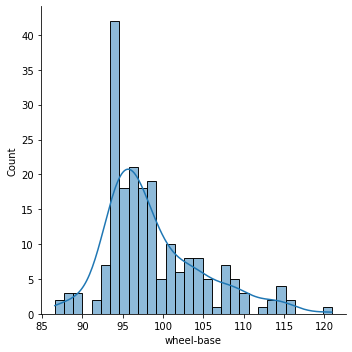

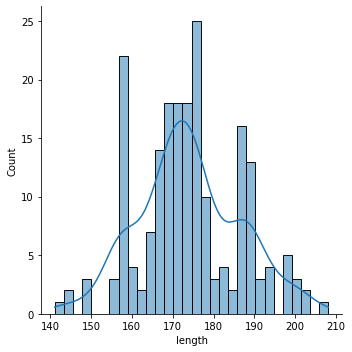

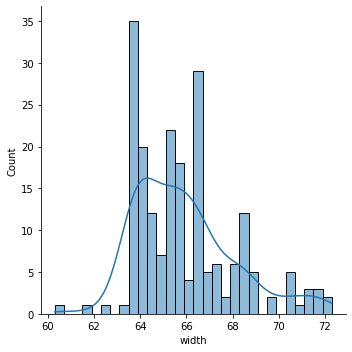

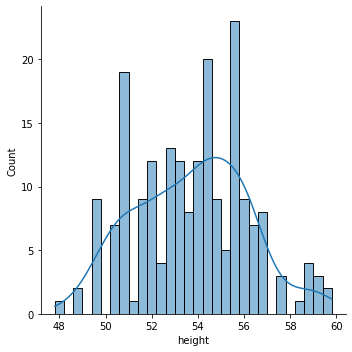

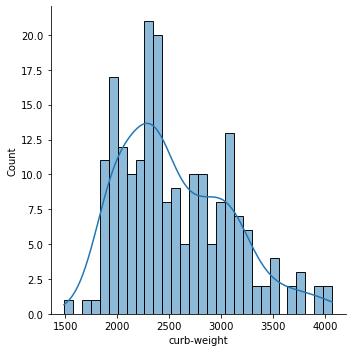

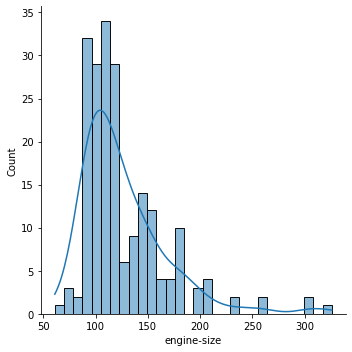

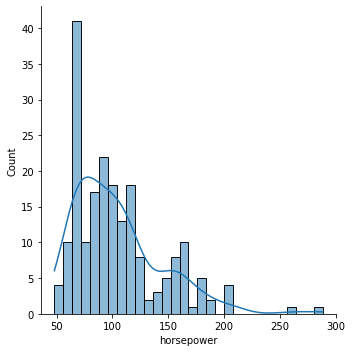

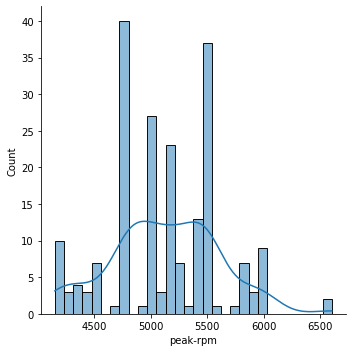

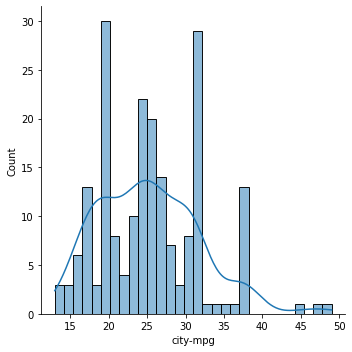

In [44]:
#showing plot charts to visualize data.
sns.displot(df3, x="wheel-base", bins=30, kde=True)
sns.displot(df3, x="length", bins=30, kde=True)
sns.displot(df3, x="width", bins=30, kde=True)
sns.displot(df3, x="height", bins=30, kde=True)
sns.displot(df3, x="curb-weight", bins=30, kde=True)
sns.displot(df3, x="engine-size", bins=30, kde=True)
sns.displot(df3, x="horsepower", bins=30, kde=True)
sns.displot(df3, x="peak-rpm", bins=30, kde=True)
sns.displot(df3, x="city-mpg", bins=30, kde=True)

Some of these variables (including our explanatory variable) feature a right-skewed distribution, including:
horsepower, engine-size, wheel-base, and city-mpg - what this tells me is that in this data set, there might be more smaller cars with less power than there are bigger cars with more power.





<AxesSubplot:>

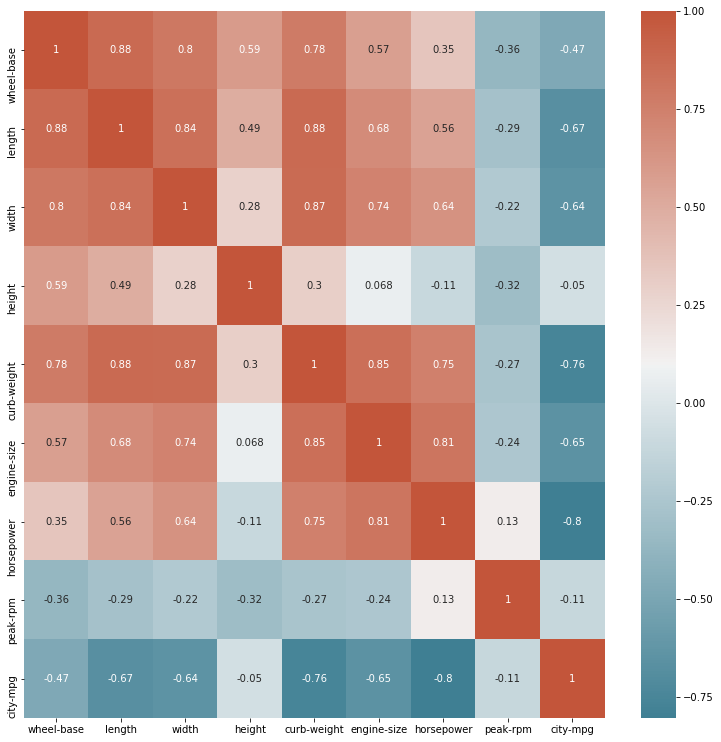

In [45]:
#let's bring up a correlation matrix to see what relationships between our continous variables we can gain insights on.

# make correlation.
corr = df3.corr()

#changing size of plot using .plt
fig, ax = plt.subplots(figsize=(13,13)) 

#plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Points to be made from correlation matrix:

1) Curb weight has the strongest positive relationship with the variable length, followed by width, engine-size, wheel-base, and lastly height.

2) Negative relationships fall in the order of city-mpg, then peak-rpm. This makes sense, the heavier an automobile, the less fuel efficient it tends to be; More mass means more force required to move the automobile - this is Newton's Second Law. 

3) Peak-rpm has too weak of a relationship to make a any valid inferences about (-0.27).



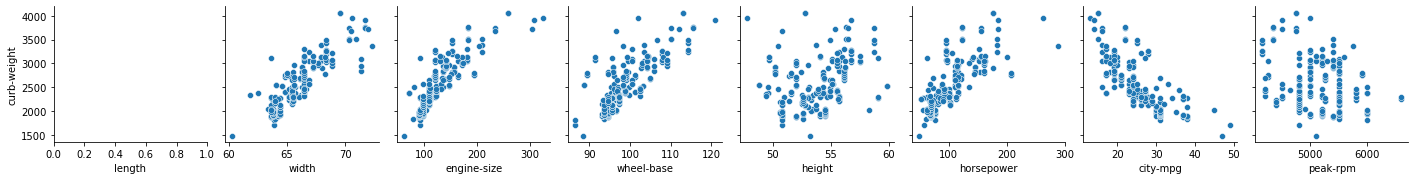

In [46]:
#let's being up a pairplot to see relationships between all variables vs our response variable, "curb-weight" in order of strength, starting with positive relationships.
sns.pairplot(data=df2,
                  y_vars=['curb-weight'],
                  x_vars=['length','width','engine-size','wheel-base','height','horsepower','city-mpg','peak-rpm'])

Points to be made from pairplots:


1) Some relationships tend to show quadratic relationships versus linear ones; the pairplots of curb-weight vs. length, engine-size, and city-mpg show curved plots.


2) Height and peak-rpm's plots look very scattered with no real pattern, confiming what we saw in the correlation matrix above.

## REGRESSION MODEL CONSTRUCTION & EVALUATION

In [47]:
#sanity check on latest df.
df3.head(5)

,wheel-base,length,width,height,curb-weight,engine-size,horsepower,peak-rpm,city-mpg
0,88.6,168.8,64.1,48.8,2548,130,111.0,5000.0,21
1,88.6,168.8,64.1,48.8,2548,130,111.0,5000.0,21
2,94.5,171.2,65.5,52.4,2823,152,154.0,5000.0,19
3,99.8,176.6,66.2,54.3,2337,109,102.0,5500.0,24
4,99.4,176.6,66.4,54.3,2824,136,115.0,5500.0,18


In [48]:
#let's clone our database to run k-fold validation

df4 = df3.copy()
df5 = df3.copy()

In [49]:
#now getting a database with only response variables
df4.drop(columns=['curb-weight'], axis=1, inplace=True)

df6 = df4.copy()
df7 = df4.copy()
df8 = df4.copy()

#sanity check
df4.head(5)


,wheel-base,length,width,height,engine-size,horsepower,peak-rpm,city-mpg
0,88.6,168.8,64.1,48.8,130,111.0,5000.0,21
1,88.6,168.8,64.1,48.8,130,111.0,5000.0,21
2,94.5,171.2,65.5,52.4,152,154.0,5000.0,19
3,99.8,176.6,66.2,54.3,109,102.0,5500.0,24
4,99.4,176.6,66.4,54.3,136,115.0,5500.0,18


In [50]:
#getting a database with only our explanatory variable
df5.drop(columns=['wheel-base','length', 'width', 'height', 'engine-size', 'horsepower', 'peak-rpm', 'city-mpg'], axis=1, inplace=True)

df5.head(5)

,curb-weight
0,2548
1,2548
2,2823
3,2337
4,2824


In [51]:
#sanity checks

In [52]:
df6.head(5)

,wheel-base,length,width,height,engine-size,horsepower,peak-rpm,city-mpg
0,88.6,168.8,64.1,48.8,130,111.0,5000.0,21
1,88.6,168.8,64.1,48.8,130,111.0,5000.0,21
2,94.5,171.2,65.5,52.4,152,154.0,5000.0,19
3,99.8,176.6,66.2,54.3,109,102.0,5500.0,24
4,99.4,176.6,66.4,54.3,136,115.0,5500.0,18


In [53]:
df7.head(5)

,wheel-base,length,width,height,engine-size,horsepower,peak-rpm,city-mpg
0,88.6,168.8,64.1,48.8,130,111.0,5000.0,21
1,88.6,168.8,64.1,48.8,130,111.0,5000.0,21
2,94.5,171.2,65.5,52.4,152,154.0,5000.0,19
3,99.8,176.6,66.2,54.3,109,102.0,5500.0,24
4,99.4,176.6,66.4,54.3,136,115.0,5500.0,18


In [54]:
df8.head(5)

,wheel-base,length,width,height,engine-size,horsepower,peak-rpm,city-mpg
0,88.6,168.8,64.1,48.8,130,111.0,5000.0,21
1,88.6,168.8,64.1,48.8,130,111.0,5000.0,21
2,94.5,171.2,65.5,52.4,152,154.0,5000.0,19
3,99.8,176.6,66.2,54.3,109,102.0,5500.0,24
4,99.4,176.6,66.4,54.3,136,115.0,5500.0,18


In [55]:
# intending to perform three different linear regressions, so now to generate particular copies of dbs with selected variables


# I will perform a linear regression using the three strongest correlated variables to the response variable, 
# a linear regression using the three weakest correlated variables to the response variable,
# and a linear regression using every variable against to the response variable.


#three strongest correlated variables in first db, (length, width, and engine-size)
df6.drop(columns=['wheel-base', 'height', 'horsepower', 'peak-rpm', 'city-mpg'], axis=1, inplace=True)
dfb = df5.copy()

#three weakest correlated variables in second db, (height, peak-rpm, and city-mpg)
df7.drop(columns=['wheel-base','length', 'width', 'engine-size', 'horsepower'], axis=1, inplace=True)
dfd = df5.copy()

In [56]:
#sanity checks

In [57]:
df6.head(2)

,length,width,engine-size
0,168.8,64.1,130
1,168.8,64.1,130


In [58]:
df7.head(2)

,height,peak-rpm,city-mpg
0,48.8,5000.0,21
1,48.8,5000.0,21


In [59]:
df8.head(2)

,wheel-base,length,width,height,engine-size,horsepower,peak-rpm,city-mpg
0,88.6,168.8,64.1,48.8,130,111.0,5000.0,21
1,88.6,168.8,64.1,48.8,130,111.0,5000.0,21


In [60]:
#loading linear regression f(x) from sklearn 'linear model' sub-library
from sklearn.linear_model import LinearRegression

#loading the cross_val_score f(x) from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score

#loading the train_test_split f(x)
from sklearn.model_selection import train_test_split

#now to split our first sets of data into training and testing subsets
#we will set aside only 20% of our data for testing purposes

X_train, X_test, y_train, y_test = train_test_split(df6, dfb, test_size=0.2, random_state=2)

In [61]:
#checking results
len(X_train)

162

In [62]:
len(X_test)

41

The data set has successfully been split into training and testing subsets. We first separated the response variable from the explanatory variables and then used the train_test_split() function to randomly sample items from the data set for inclusion in our training and testing subsets. We have set aside 20% of the data for testing purposes.


Using scikit-learn's Cross Validation Capabilities.

scikit-learn provides us with an easy-to-use cross validation capability via the cross_val_score() function. To make use of it, we must first split their data into training and testing subsets (as we did above) and select the machine learning model they believe to be appropriate for their task at hand. We continue our example from above by constructing a small linear regression model for purposes of predicting curb-weight from the other variables.

I will only be using 5-fold cross validation since our data set is rather small (only 205 rows).

In [63]:
# Assigning the model function you want to use to a variable
LRmodel = LinearRegression()

# fit the model using 5-fold cross validation
scores = cross_val_score(LRmodel, X_train, y_train, cv=5)

# print out the R^2 metrics derived from the K-fold cross validation of our linear regression model
print (scores)

np.mean(scores)

[0.93287481 0.9158332  0.89941048 0.91534031 0.90848798]


0.9143893555022489

We are presented with an average cross-validated R^2 score of 0.9143 which in my opinion is a good score, considering that our highest correlation with any one variable for curb-weight was 0.88 in our seaborn heatmap.

Let's try to repeat the process using the three WEAKEST relationships as shown from our Seaborn Heatmap.

In [64]:
#splitting our second sets of data into training and testing subsets
#we will set aside only 20% of our data for testing purposes

X_train, X_test, y_train, y_test = train_test_split(df7, dfb, test_size=0.2, random_state=2)

In [65]:
# Assigning the model function you want to use to a variable
LRmodel = LinearRegression()

# fit the model using 5-fold cross validation
scores = cross_val_score(LRmodel, X_train, y_train, cv=5)

# print out the R^2 metrics derived from the K-fold cross validation of our linear regression model
print (scores)

np.mean(scores)

[0.72367631 0.54815223 0.7046352  0.73830831 0.78066651]


0.6990877115278682

We are presented with an average cross-validated R^2 score of 0.6991 which in my opinion is a bad score, considering that we have a stronger correlation with the 4th strongest variable to curb-weight, which is wheel-base.

This is to be expected since I chose the weakest related variables to curb-weight.

Let's run this one more time using every variable except for the response one, of course.

In [66]:
#splitting our last sets of data into training and testing subsets
#we will set aside only 20% of our data for testing purposes

X_train, X_test, y_train, y_test = train_test_split(df8, dfb, test_size=0.2, random_state=2)

In [67]:
# Assigning the model function you want to use to a variable
LRmodel = LinearRegression()

# fit the model using 5-fold cross validation
scores = cross_val_score(LRmodel, X_train, y_train, cv=5)

# print out the R^2 metrics derived from the K-fold cross validation of our linear regression model
print (scores)

np.mean(scores)

[0.93773815 0.92697423 0.92795439 0.93836374 0.90900917]


0.9280079355220296

## CONCLUSION

Interestingly enough, we are presented with an average cross-validated R^2 score of 0.9280 which is our best score yet for our linear regression.

Perhaps this goes back to the more information the better, perhaps if we had more continous variables in our dataset to run linear regression on, we would achieve a higher score. Granted, I think these results are satisfactory, and perhaps a stronger model could be argued to be overfit.

The difference between using our strongest three variables and all of them is not that much, approximately .01 of a difference. This probably alludes to our future lesson of feature selection, showing how only our top three variables were needed for a decent regression.